<a href="https://colab.research.google.com/github/kavya6301/Grocery-sales-prediction/blob/main/Grocery_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df=pd.read_csv("/content/drive/MyDrive/ML projects/Grocery sales prediction/Train.csv")

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#checking data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_weight and Outlet_Size are missing some values (null values)

In [5]:
 corr_matrix=df.corr()
 corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

Item_MRP has good correlation with Item_Outlet_Sales (i.e., our output).





Let's start checking the coloumns with respect to relation with our output "**Item_Outlet_Sales**"

In [ ]:
df.Item_Identifier.value_counts()

FDG33    10
FDW13    10
FDT07     9
FDX04     9
FDD38     9
         ..
FDQ60     1
FDY43     1
DRF48     1
FDK57     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

From above, **Item_Identifier** should be categorical data

In [ ]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

LF and low fat is same as Low Fat and reg is same as Regular 

In [6]:
#We replace them such that two categories remain which are Low Fat and Regular
df.Item_Fat_Content= df.Item_Fat_Content.replace('LF','Low Fat')
df.Item_Fat_Content= df.Item_Fat_Content.replace('low fat','Low Fat')
df.Item_Fat_Content= df.Item_Fat_Content.replace('reg','Regular')

In [7]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

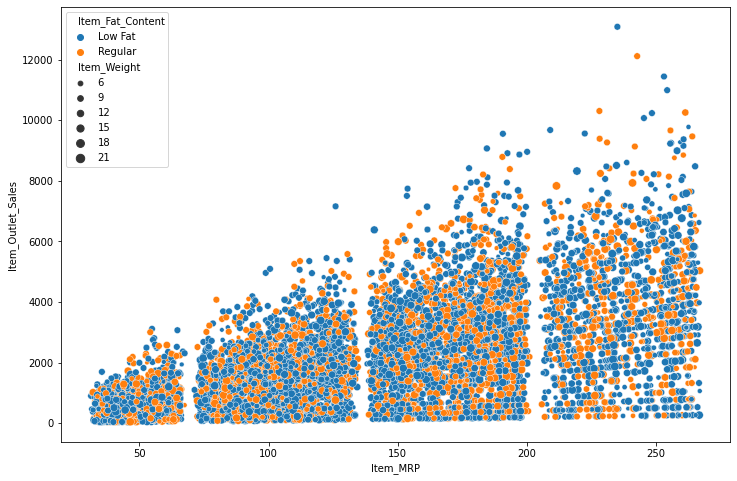

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df)

In [8]:
#ITEM_MRP column contain prices which are in clusters so it would be better if we convert this columnn into bins for further processing
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


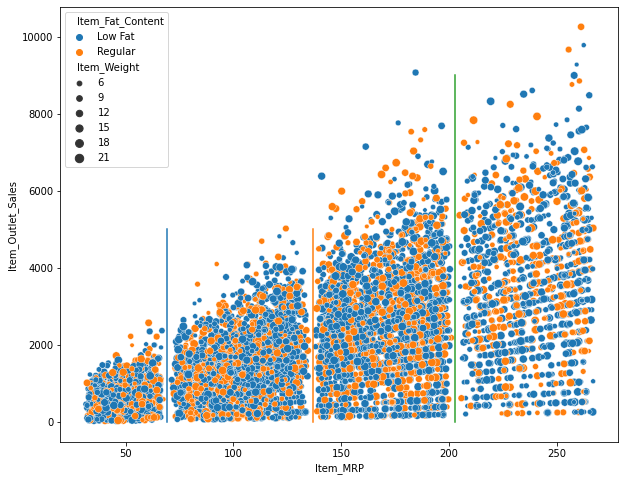

In [9]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df)
plt.plot([69,69],[0,5000])
plt.plot([137,137],[0,5000])
plt.plot([203,203],[0,9000])

In [10]:
#We can use these perpendicular lines to divide data into proper bins. So from above graph we got out bin value. Now
df.Item_MRP=pd.cut(df.Item_MRP,bins=[25,69,137,203,270],labels=['a','b','c','d'],right=True)

In [11]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,d,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,a,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,c,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,c,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,a,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


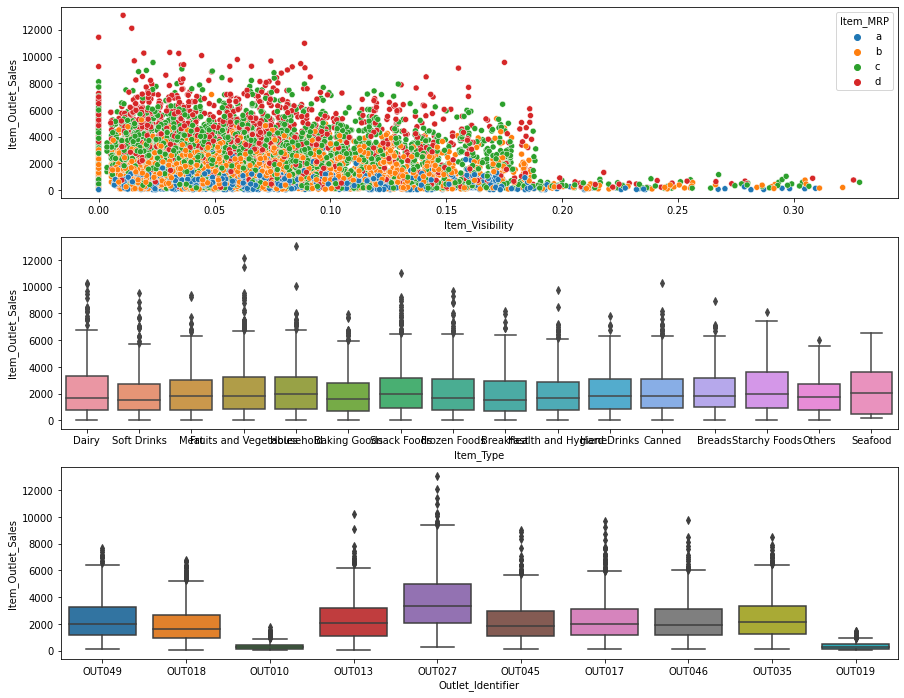

In [12]:
#exploring other columns
fig,axes=plt.subplots(3,1,figsize=(15,12))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_MRP',ax=axes[0],data=df)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[1],data=df)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[2],data=df)

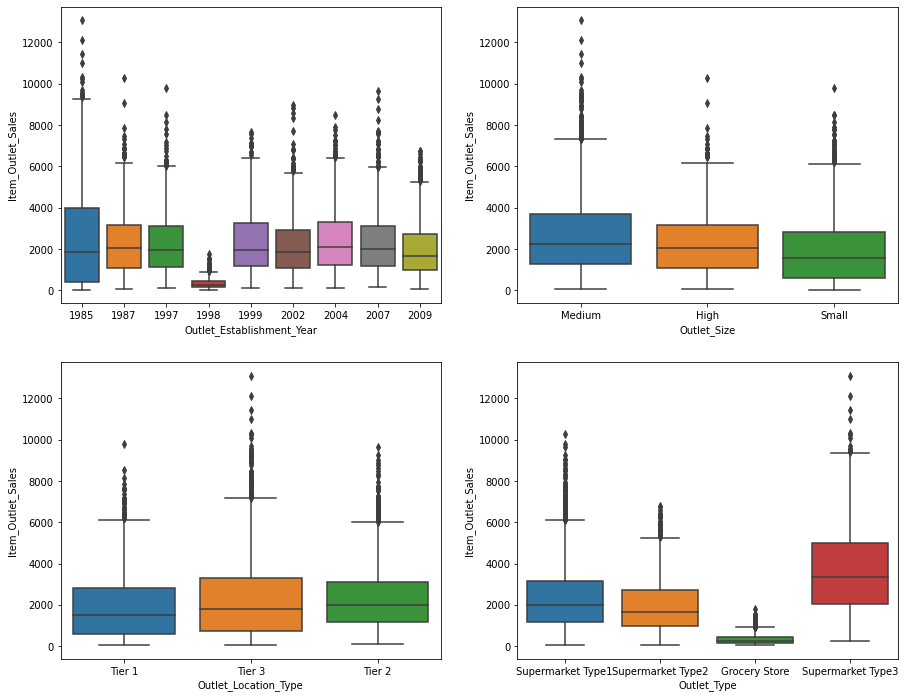

In [13]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=df)

From above plots we can say that we can drop **ITEM_VISIBILiTY** along with **ITEM_WEIGHT** . 
Further more both of these column have very low correlation strength with target column.


In [14]:
#Therefore Columns for model training will be
attributes=['Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Establishment_Year','Outlet_Identifier','Item_Type','Item_Outlet_Sales']

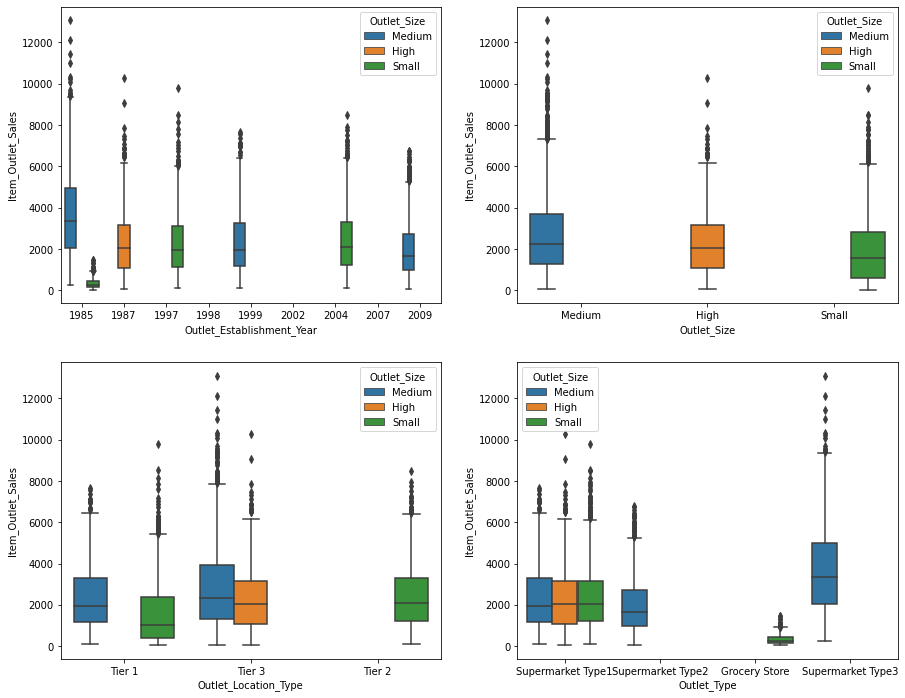

In [15]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,1],data=df)

In [16]:
data=df[attributes]

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_MRP                   8523 non-null   category
 1   Outlet_Type                8523 non-null   object  
 2   Outlet_Location_Type       8523 non-null   object  
 3   Outlet_Size                6113 non-null   object  
 4   Outlet_Establishment_Year  8523 non-null   int64   
 5   Outlet_Identifier          8523 non-null   object  
 6   Item_Type                  8523 non-null   object  
 7   Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(1), float64(1), int64(1), object(5)
memory usage: 474.7+ KB


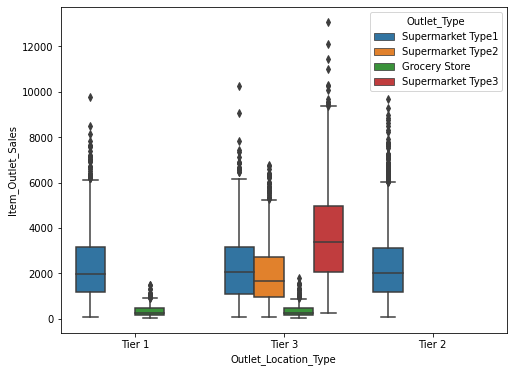

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(8,6))
sns.boxplot(y='Item_Outlet_Sales',hue='Outlet_Type',x='Outlet_Location_Type',data=data)

In [ ]:
data[data.Outlet_Size.isnull()]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
3,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
8,b,Supermarket Type1,Tier 2,NaN,2002,OUT045,Frozen Foods,1076.5986
9,c,Supermarket Type1,Tier 2,NaN,2007,OUT017,Frozen Foods,4710.5350
25,a,Supermarket Type1,Tier 2,NaN,2007,OUT017,Household,838.9080
28,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,178.4344
...,...,...,...,...,...,...,...,...
8502,d,Supermarket Type1,Tier 2,NaN,2002,OUT045,Household,3020.0688
8508,c,Supermarket Type1,Tier 2,NaN,2002,OUT045,Fruits and Vegetables,2587.9646
8509,d,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,424.7804
8514,a,Supermarket Type1,Tier 2,NaN,2002,OUT045,Canned,468.7232


One thing to observe is when **OUTLET_TYPE = supermarket type 1 and OUTLET_LOCATION_TYPE is Tier 2** 
then outlet size is null furthermore when **OUTLET_TYPE = Grocery store and OUTLET_LOCATION_TYPE is Tier 3** then outlet size is always null


In [18]:
data.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [22]:
data.groupby(['Outlet_Location_Type'])['Outlet_Identifier'].value_counts()

Outlet_Location_Type  Outlet_Identifier
Tier 1                OUT046               930
                      OUT049               930
                      OUT019               528
Tier 2                OUT035               930
                      OUT045               929
                      OUT017               926
Tier 3                OUT027               935
                      OUT013               932
                      OUT018               928
                      OUT010               555
Name: Outlet_Identifier, dtype: int64

In [20]:
data.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [19]:
data.groupby('Outlet_Size').Outlet_Identifier.value_counts()

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT027               935
             OUT049               930
             OUT018               928
Small        OUT035               930
             OUT046               930
             OUT019               528
Name: Outlet_Identifier, dtype: int64

Tier 1 have small and medium size shop. Tier 2 have small and (missing 1) type shop. 
Tier 3 have 2-medium and 1 high and (missing 2) shop.
Tier 2 will have medium size shop in missing 1 and Tier 3 will be high or medium size shop

In [23]:
def func(x):
    if x.Outlet_Identifier == 'OUT010' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT045' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT017' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT013' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT046' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT035' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT019' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT027' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT049' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT018' :
        x.Outlet_Size == 'Medium'
    return(x)

In [24]:
data.Outlet_Size=data.apply(func,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [25]:
data.Outlet_Establishment_Year=data.Outlet_Establishment_Year.astype('category')
data_label=data.Item_Outlet_Sales
data_dummy=pd.get_dummies(data.iloc[:,0:6])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
data_dummy['Item_Outlet_Sales']=data_label

In [27]:
data_dummy.shape

(8523, 35)

#Now we can apply ML algorithms

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train,test = train_test_split(data_dummy,test_size=0.20,random_state=2019)

In [30]:
train.shape , test.shape

((6818, 35), (1705, 35))

In [31]:
train_label=train['Item_Outlet_Sales']
test_label=test['Item_Outlet_Sales']
del train['Item_Outlet_Sales']
del test['Item_Outlet_Sales']

#Linear Regression:

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr=LinearRegression()
lr.fit(train,train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
from sklearn.metrics import mean_squared_error
predict_lr=lr.predict(test)
mse=mean_squared_error(test_label,predict_lr)
lr_score=np.sqrt(mse)
lr_score

1145.4671767325904

Cross validation for linear regression:

In [35]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,train,train_label,cv=10,scoring='neg_mean_squared_error')
lr_score_cross=np.sqrt(-score)
np.mean(lr_score_cross),np.std(lr_score_cross)

(1159.0693766900845, 33.44070899876766)

#Ridge regression:

In [36]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.05,solver='cholesky')
r.fit(train,train_label)
predict_r=r.predict(test)
mse=mean_squared_error(test_label,predict_r)
r_score=np.sqrt(mse)
r_score

1144.4690669590325

Cross val Ridge:

In [37]:
r=Ridge(alpha=0.05,solver='cholesky')
score=cross_val_score(r,train,train_label,cv=10,scoring='neg_mean_squared_error')
r_score_cross=np.sqrt(-score)
np.mean(r_score_cross),np.std(r_score_cross)

(1157.777709625932, 33.39971635231648)

#LASSO:

In [38]:
from sklearn.linear_model import Lasso
l=Lasso(alpha=0.01)
l.fit(train,train_label)
predict_l=l.predict(test)
mse=mean_squared_error(test_label,predict_l)
l_score=np.sqrt(mse)
l_score

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 939823349.1706057, tolerance: 1986800.217654244
  positive)


1144.4699930635782

Cross val LASSO:

In [39]:
l=Lasso(alpha=0.01)
score=cross_val_score(l,train,train_label,cv=10,scoring='neg_mean_squared_error')
l_score_cross=np.sqrt(-score)
np.mean(l_score_cross),np.std(l_score_cross)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 875485300.2798262, tolerance: 1783083.7909009983
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 874129575.3022938, tolerance: 1781381.1899666344
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 842757176.3940554, tolerance: 1779641.434999413
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 850958061.

(1157.777765443213, 33.3992458063328)

#Elastic Net:

In [40]:
from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=0.01,l1_ratio=0.5)
en.fit(train,train_label)
predict_r=en.predict(test)
mse=mean_squared_error(test_label,predict_r)
en_score=np.sqrt(mse)
en_score

1144.9781948836999

Cross val elastic:

In [41]:
en=ElasticNet(alpha=0.01,l1_ratio=0.5)
score=cross_val_score(en,train,train_label,cv=10,scoring='neg_mean_squared_error')
en_score_cross=np.sqrt(-score)
np.mean(en_score_cross),np.std(en_score_cross)

(1157.9161183663578, 33.67152510244037)

#Stochastic Gradient:

In [45]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(penalty='l2',n_iter_no_change=100,alpha=0.05)
sgd.fit(train,train_label)
predict_r=sgd.predict(test)
mse=mean_squared_error(test_label,predict_r)
sgd_score=np.sqrt(mse)
sgd_score

1161.2709943863397

Cross val Stochastic gradient:

In [47]:
sgd=SGDRegressor(penalty='l2',n_iter_no_change=100,alpha=0.05)
score=cross_val_score(sgd,train,train_label,cv=10,scoring='neg_mean_squared_error')
sgd_score_cross=np.sqrt(-score)
np.mean(sgd_score_cross),np.std(sgd_score_cross)

(1172.6293618978166, 35.87315415318766)

#SVR:

In [48]:
from sklearn.svm import SVR
svm=SVR(epsilon=15,kernel='linear')
svm.fit(train,train_label)
predict_r=svm.predict(test)
mse=mean_squared_error(test_label,predict_r)
svm_score=np.sqrt(mse)
svm_score

1329.3117775808328

Cross val SVR:

In [49]:
svm=SVR(epsilon=15,kernel='linear')
score=cross_val_score(svm,train,train_label,cv=10,scoring='neg_mean_squared_error')
svm_score_cross=np.sqrt(-score)
np.mean(svm_score_cross),np.std(svm_score_cross)

(1344.685633189582, 42.76247863010083)

#Decision Tree:

In [50]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(train,train_label)
predict_r=dtr.predict(test)
mse=mean_squared_error(test_label,predict_r)
dtr_score=np.sqrt(mse)
dtr_score

1106.0941739809819

In [51]:
dtr=DecisionTreeRegressor()
score=cross_val_score(dtr,train,train_label,cv=10,scoring='neg_mean_squared_error')
dtr_score_cross=np.sqrt(-score)
np.mean(dtr_score_cross),np.std(dtr_score_cross)

(1105.3154753791673, 31.53765829505404)

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(train,train_label)
predict_r=rf.predict(test)
mse=mean_squared_error(test_label,predict_r)
rf_score=np.sqrt(mse)
rf_score

1106.137571076169

In [53]:
rf=RandomForestRegressor()
score=cross_val_score(rf,train,train_label,cv=10,scoring='neg_mean_squared_error')
rf_score_cross=np.sqrt(-score)
np.mean(rf_score_cross),np.std(rf_score_cross)

(1105.3683284065073, 31.709735465642396)

In [56]:
name=['Linear Regression','Linear Regression CV','Ridge Regression','Ridge Regression CV','Lasso Regression',
     'Lasso Regression CV','Elastic Net Regression','Elastic Net Regression CV','SGD Regression','SGD Regression CV',
     'SVM','SVM CV','Decision Tree','Decision Tree Regression','Random Forest','Random Forest CV']

In [57]:
go=pd.DataFrame({'RMSE':[lr_score,lr_score_cross,r_score,r_score_cross,l_score,l_score_cross,en_score,en_score_cross,
                     sgd_score,sgd_score_cross,svm_score,svm_score_cross,dtr_score,dtr_score_cross,rf_score,rf_score_cross]},index=name)

In [58]:
go['RMSE']=go.applymap(lambda x: x.mean())
go.RMSE.sort_values()

Decision Tree Regression     1105.315475
Random Forest CV             1105.368328
Decision Tree                1106.094174
Random Forest                1106.137571
Ridge Regression             1144.469067
Lasso Regression             1144.469993
Elastic Net Regression       1144.978195
Linear Regression            1145.467177
Ridge Regression CV          1157.777710
Lasso Regression CV          1157.777765
Elastic Net Regression CV    1157.916118
Linear Regression CV         1159.069377
SGD Regression               1161.270994
SGD Regression CV            1172.629362
SVM                          1329.311778
SVM CV                       1344.685633
Name: RMSE, dtype: float64

It seems like Decision Tree Regression doing better than others
